In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("usedcars_dataset.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-mpg,price,city-L/100km,highway-L/100km,price_binned,diesel,gas,normalized_length,normalized_width,normalized_height
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,27,13495,11.190476,8.703704,Low,0,1,-0.438315,-0.851335,-2.029015
1,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,27,16500,11.190476,8.703704,Low,0,1,-0.438315,-0.851335,-2.029015
2,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,26,16500,12.368421,9.038462,Low,0,1,-0.243544,-0.185134,-0.558319
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,176.6,...,30,13950,9.791667,7.833333,Low,0,1,0.194690,0.147966,0.217881
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,176.6,...,22,17450,13.055556,10.681818,Low,0,1,0.194690,0.243137,0.217881


In the above data shows the normalized-losses, price and other datas for used cars

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       199 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
city-L/100km          0
highway-L/100km       0
price_binned          0
diesel                0
gas                   0
normalized_length     0
normalized_width      0
normalized_height     0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
highway-L/100km      0
price_binned         0
diesel               0
gas                  0
normalized_length    0
normalized_width     0
normalized_height    0
dtype: int64

In [7]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
highway-L/100km      float64
price_binned          object
diesel                 int64
gas                    int64
normalized_length    float64
normalized_width     float64
normalized_height    float64
dtype: object

In [8]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,normalized_length,normalized_width,normalized_height
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,...,26.522013,32.081761,11445.729560,9.324008,7.622447,0.094340,0.905660,-0.145036,-0.133957,0.054213
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,...,6.097142,6.459189,5877.856195,2.127124,1.548959,0.293224,0.293224,0.935158,0.926914,0.926849
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,...,15.000000,18.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,-2.686295,-2.659592,-1.783899
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,...,23.000000,28.000000,7372.000000,7.580645,6.351351,0.000000,1.000000,-0.693952,-0.898920,-0.619598
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,...,26.000000,32.000000,9233.000000,9.038462,7.343750,0.000000,1.000000,-0.146159,-0.232720,0.136175
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,...,31.000000,37.000000,14719.500000,10.217391,8.392857,0.000000,1.000000,0.292075,0.290723,0.708112
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,...,49.000000,54.000000,35056.000000,15.666667,13.055556,1.000000,1.000000,2.304707,2.765180,2.464776


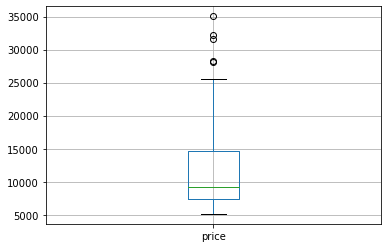

In [9]:
df.plot(kind='box',x='drive-wheels', y='price')
plt.grid()
plt.show()

In the above box plot shows the avg price is 11000

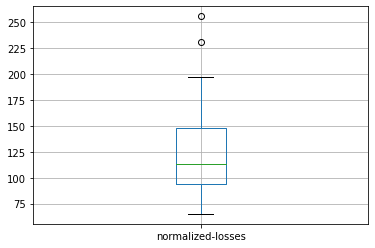

In [10]:
df.plot(kind='box',x='price', y='normalized-losses')
plt.grid()
plt.show()

In the above graph shows the avg normalized loss is upto 120

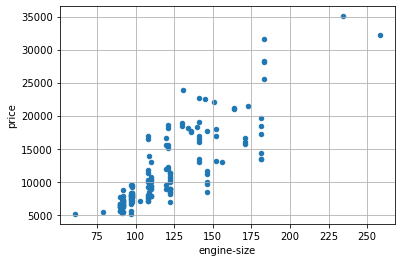

In [11]:
df.plot(kind='scatter',x='engine-size', y='price')
plt.grid()
plt.show()

In the above graph shows the price of engine-size max is 5000 to 15000

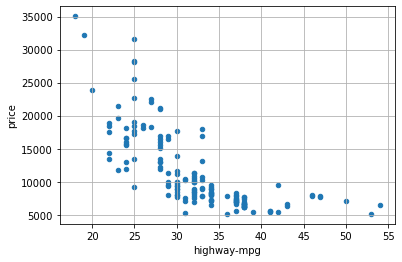

In [12]:
df.plot(kind='scatter',x='highway-mpg', y='price')
plt.grid()
plt.show()

In the above graph shows the avg highway-mpg is 30 to 35

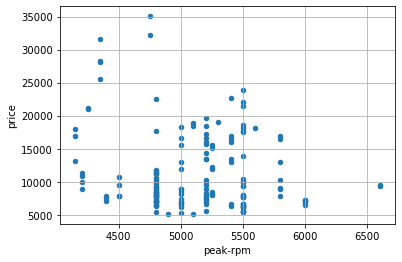

In [13]:
df.plot(kind='scatter',x='peak-rpm', y='price')
plt.grid()
plt.show()

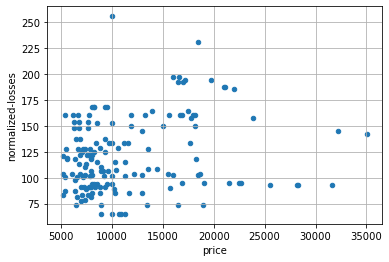

In [14]:
df.plot(kind='scatter',x='price', y='normalized-losses')
plt.grid()
plt.show()

In the above graph shows max normalized loss occurs in price of 5000 to 10000

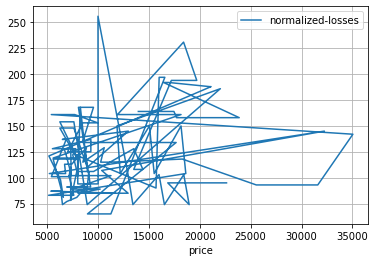

In [15]:
df.plot(kind='line',x='price', y='normalized-losses')
plt.grid()
plt.show()

In the above graph shows max normalized loss occurs in price of 5000 to 10000

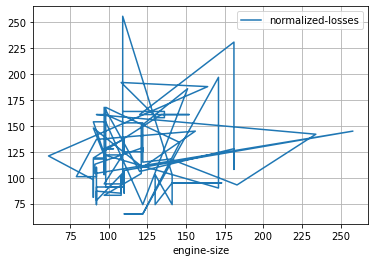

In [16]:
df.plot(kind='line',x='engine-size', y='normalized-losses')
plt.grid()
plt.show()

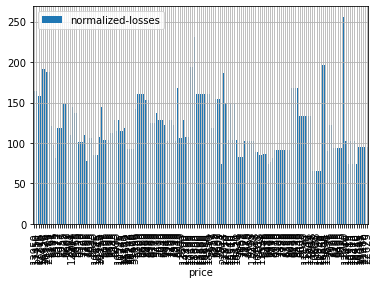

In [17]:
df.plot(kind='bar',x='price', y='normalized-losses')
plt.grid()
plt.show()

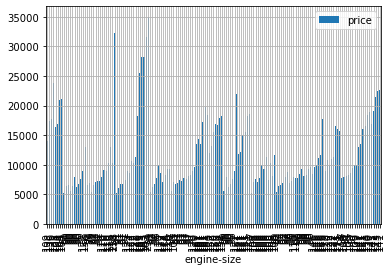

In [18]:
df.plot(kind='bar',x='engine-size', y='price')
plt.grid()
plt.show()

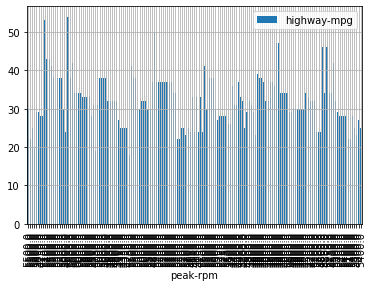

In [19]:
df.plot(kind='bar',x='peak-rpm', y='highway-mpg')
plt.grid()
plt.show()

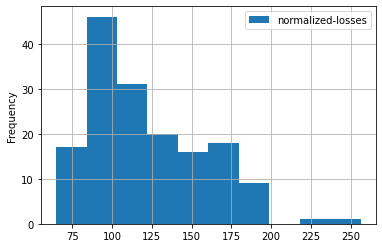

In [20]:
df.plot(kind='hist',x='price', y='normalized-losses')
plt.grid()
plt.show()

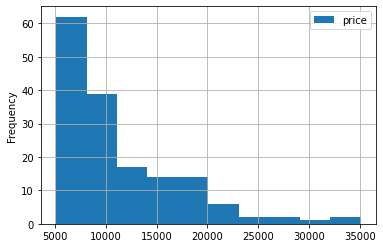

In [21]:
df.plot(kind='hist',x='engine-size', y='price')
plt.grid()
plt.show()

The max engine size frequency is 5000 to 7000 

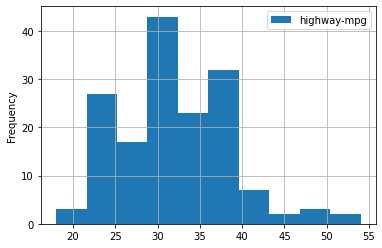

In [22]:
df.plot(kind='hist',x='peak-rpm', y='highway-mpg')
plt.grid()
plt.show()

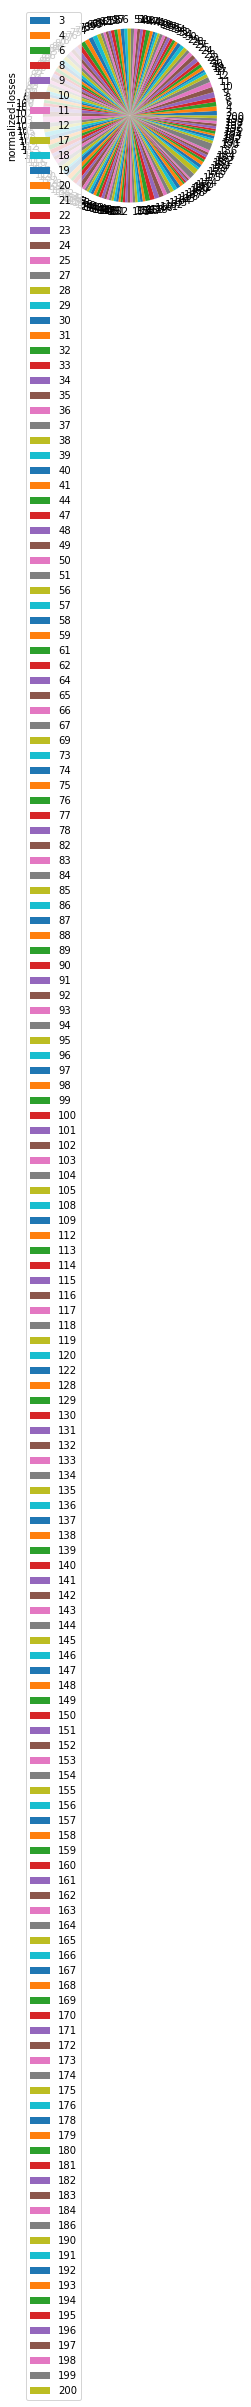

In [23]:
df.plot(kind='pie',x='price', y='normalized-losses')
plt.grid()
plt.show()

In [24]:
X = df.loc[:,['drive-wheels','engine-size','price']].values


In [25]:
X = df.iloc[:,0:-1]

In [26]:
X = pd.get_dummies(X)

In [27]:
X

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,price_binned_High,price_binned_Low,price_binned_Median
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,0,0,0,0,0,1,0,0,0,1
9,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,1,0,0,1,0
197,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,1,0,0,0,1
198,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,1,0,0,0,1
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,1,0,0,0,0,0,1


# Feature Scaling

Whenever we are dealing with KNN algorithm, we should do the feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
X

array([[ 1.06291198,  1.20622213,  0.29815708, ..., -0.11286653,
         0.34600334, -0.32274861],
       [ 1.06291198,  1.20622213,  0.22050438, ..., -0.11286653,
         0.34600334, -0.32274861],
       [ 0.22210101,  1.03739351,  1.46294766, ..., -0.11286653,
         0.34600334, -0.32274861],
       ...,
       [-1.45952093, -0.73530707,  2.10358247, ..., -0.11286653,
        -2.89014553,  3.09838668],
       [-1.45952093, -0.73530707,  2.10358247, ..., -0.11286653,
        -2.89014553,  3.09838668],
       [-1.45952093, -0.73530707,  2.10358247, ..., -0.11286653,
        -2.89014553,  3.09838668]])

In [30]:
y = df.loc[:,['normalized-losses']].values

In [31]:
y = y.reshape(-1)

In [32]:
y.shape

(159,)

In [33]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.25)

In [34]:
#importing classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Selecting the k value.

In [36]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

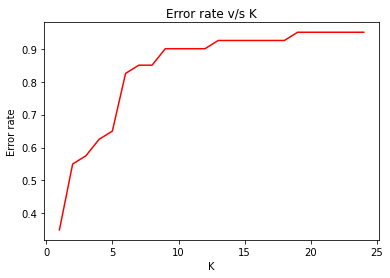

In [37]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

NOTE : from the above graph we can select k value as 1

# Model Building

In [38]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model Evaluation

In [39]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred)

0.35